# GP binary classification:
The homework consists of two parts:
1. Play around with a toy dataset and the scikit-learn black box GPs. This part is done to give you an intuition and ask high-level questions about Gaussian Processes, Kernels, etc. (easy part)
2. Implement a binary classification GP yourself and apply it to the toy dataset and FashionMNIST dataset (harder part)

# Toy dataset to get a feeling for binary GP classification

In [1]:
# Copied and adapted from: 
# https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpc.html#sphx-glr-download-auto-examples-gaussian-process-plot-gpc-py
# Original Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>


import numpy as np

from matplotlib import pyplot as plt

from sklearn.metrics import accuracy_score, log_loss
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, Matern, DotProduct, RationalQuadratic, ExpSineSquared

np.random.seed(42)

In [36]:
#create a toy dataset
n = 100
train_size = 50

X = np.random.uniform(0,5, n)
y = (X > 2.5).astype(int) #using bool to int casting

X_train = X[0:train_size].reshape(-1,1)
y_train = y[0:train_size]
X_test = X[train_size:n].reshape(-1,1)
y_test = y[train_size:n]

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (50, 1)
y_train shape:  (50,)
X_test shape:  (50, 1)
y_test shape:  (50,)


In [37]:
# specify the kernel
RBF_kernel = 1.0 * RBF(length_scale=1.0)
Matern_kernel = 1.0 * Matern(length_scale=1.0, nu=1.5)
RationalQuadratic_kernel = 1.0 * RationalQuadratic(alpha=0.1, length_scale=1.0)
ExpSineSquared_kernel = 1.0 * ExpSineSquared(length_scale=1, periodicity=3)
DotProduct_kernel = 1 * DotProduct(sigma_0=1.0)

In [38]:
# Specify Gaussian Processes with fixed and optimized hyperparameters
kernel = DotProduct_kernel

gp_fix = GaussianProcessClassifier(kernel=kernel,
                                   optimizer=None)
gp_fix.fit(X_train, y_train)

gp_opt = GaussianProcessClassifier(kernel=kernel)
gp_opt.fit(X_train, y_train)

GaussianProcessClassifier(copy_X_train=True,
                          kernel=1**2 * DotProduct(sigma_0=1),
                          max_iter_predict=100, multi_class='one_vs_rest',
                          n_jobs=None, n_restarts_optimizer=0,
                          optimizer='fmin_l_bfgs_b', random_state=None,
                          warm_start=False)

In [39]:
# plot marginal likelihoods
print("Log Marginal Likelihood (initial): %.3f"
      % gp_fix.log_marginal_likelihood(gp_fix.kernel_.theta))
print("Log Marginal Likelihood (optimized): %.3f"
      % gp_opt.log_marginal_likelihood(gp_opt.kernel_.theta))

print("Accuracy: %.3f (initial) %.3f (optimized)"
      % (accuracy_score(y_train, gp_fix.predict(X_train)),
         accuracy_score(y_train, gp_opt.predict(X_train))))
print("Log-loss: %.3f (initial) %.3f (optimized)"
      % (log_loss(y_train, gp_fix.predict_proba(X_train)[:, 1]),
         log_loss(y_train, gp_opt.predict_proba(X_train)[:, 1])))

Log Marginal Likelihood (initial): -17.517
Log Marginal Likelihood (optimized): -6.151
Accuracy: 0.960 (initial) 1.000 (optimized)
Log-loss: 0.226 (initial) 0.095 (optimized)


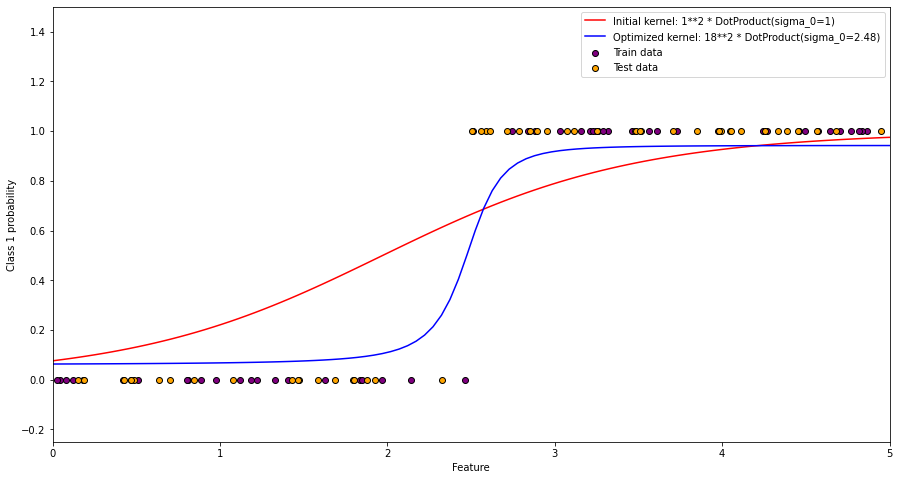

In [40]:
# Plot posteriors
plt.figure(figsize=(15,8))
plt.scatter(X_train[:, 0], y_train, c='purple', label="Train data",
            edgecolors=(0, 0, 0))
plt.scatter(X_test[:, 0], y_test, c='orange', label="Test data",
            edgecolors=(0, 0, 0))
X_ = np.linspace(0, 5, 100)
plt.plot(X_, gp_fix.predict_proba(X_[:, np.newaxis])[:, 1], 'r',
         label="Initial kernel: %s" % gp_fix.kernel_)
plt.plot(X_, gp_opt.predict_proba(X_[:, np.newaxis])[:, 1], 'b',
         label="Optimized kernel: %s" % gp_opt.kernel_)
plt.xlabel("Feature")
plt.ylabel("Class 1 probability")
plt.xlim(0, 5)
plt.ylim(-0.25, 1.5)
plt.legend(loc="best")

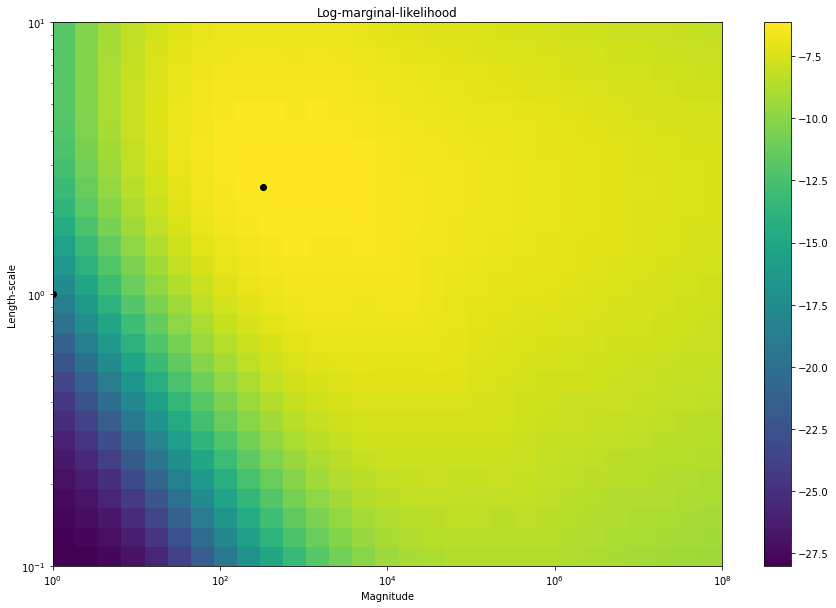

In [41]:
# Plot LML landscape
plt.figure(figsize=(15,10))
theta0 = np.logspace(0, 8, 30)
theta1 = np.logspace(-1, 1, 29)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp_opt.log_marginal_likelihood(np.log([Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
plt.plot(np.exp(gp_fix.kernel_.theta)[0], np.exp(gp_fix.kernel_.theta)[1],
         'ko', zorder=10)
plt.plot(np.exp(gp_opt.kernel_.theta)[0], np.exp(gp_opt.kernel_.theta)[1],
         'ko', zorder=10)
plt.pcolor(Theta0, Theta1, LML)
plt.xscale("log")
plt.yscale("log")
plt.colorbar()
plt.xlabel("Magnitude")
plt.ylabel("Length-scale")
plt.title("Log-marginal-likelihood")

plt.show()

## High-level questions:
1. What do the blue and the red line in the posterior plot represent?   
2. What is does the log-marginal-likelihood describe?

### One sentence answers are sufficient. Text is sufficient. 
1. <font color="blue">The blue line represents the initial kernel (before optimization). The red line represents the optimized kernel (after optimization).</font>

2. <font color="blue">The log-marginal likelihood describes how well the chosen/optimized values of the parameters for the kernel fit the data.</font>

## Play around with the code:
1. Check out all 5 different kernels. Which one is the best fit? Is any Kernel strictly better than another?
2. Implement a different function and test it with all 5 Kernels. Is every Kernel able to fit the problem? The function can be simple, e.g. 1 if x < 1 or x > 4, 0 else. 

### 1. Different Kernels: one sentence per answer is sufficient

<font color="blue">According to the log-marginal likelihood, the Matern kernel is the best one. All kernels (except the `DotProduct_kernel` - "worst" result) had similar results (around $-4.6$). So, there is no kernel that is strictly better than all others.</font>

### 2. Different function

In [42]:
#Copy the the relevant parts of the code from above and plot your function with the respective kernel

#create a toy dataset
n = 100
train_size = 50

XX = np.random.uniform(0,5, n)
yy = ((XX < 1) | (XX > 4)).astype(int) #using bool to int casting

XX_train = XX[0:train_size].reshape(-1,1)
yy_train = yy[0:train_size]
XX_test = XX[train_size:n].reshape(-1,1)
yy_test = yy[train_size:n]

print("XX_train shape: ", XX_train.shape)
print("yy_train shape: ", yy_train.shape)
print("XX_test shape: ", XX_test.shape)
print("yy_test shape: ", yy_test.shape)

XX_train shape:  (50, 1)
yy_train shape:  (50,)
XX_test shape:  (50, 1)
yy_test shape:  (50,)


In [43]:
# specify the kernel
RBF_kernel = 1.0 * RBF(length_scale=1.0)
Matern_kernel = 1.0 * Matern(length_scale=1.0, nu=1.5)
RationalQuadratic_kernel = 1.0 * RationalQuadratic(alpha=0.1, length_scale=1.0)
ExpSineSquared_kernel = 1.0 * ExpSineSquared(length_scale=1, periodicity=3)
DotProduct_kernel = 1 * DotProduct(sigma_0=1.0)

In [44]:
# Specify Gaussian Processes with fixed and optimized hyperparameters
kernel = RBF_kernel

gp_fix = GaussianProcessClassifier(kernel=kernel,
                                   optimizer=None)
gp_fix.fit(XX_train, yy_train)

gp_opt = GaussianProcessClassifier(kernel=kernel)
gp_opt.fit(XX_train, yy_train)

GaussianProcessClassifier(copy_X_train=True, kernel=1**2 * RBF(length_scale=1),
                          max_iter_predict=100, multi_class='one_vs_rest',
                          n_jobs=None, n_restarts_optimizer=0,
                          optimizer='fmin_l_bfgs_b', random_state=None,
                          warm_start=False)

In [45]:
# plot marginal likelihoods
print("Log Marginal Likelihood (initial): %.3f"
      % gp_fix.log_marginal_likelihood(gp_fix.kernel_.theta))
print("Log Marginal Likelihood (optimized): %.3f"
      % gp_opt.log_marginal_likelihood(gp_opt.kernel_.theta))

print("Accuracy: %.3f (initial) %.3f (optimized)"
      % (accuracy_score(yy_train, gp_fix.predict(XX_train)),
         accuracy_score(yy_train, gp_opt.predict(XX_train))))
print("Log-loss: %.3f (initial) %.3f (optimized)"
      % (log_loss(yy_train, gp_fix.predict_proba(XX_train)[:, 1]),
         log_loss(yy_train, gp_opt.predict_proba(XX_train)[:, 1])))

Log Marginal Likelihood (initial): -19.220
Log Marginal Likelihood (optimized): -6.704
Accuracy: 0.980 (initial) 1.000 (optimized)
Log-loss: 0.249 (initial) 0.309 (optimized)


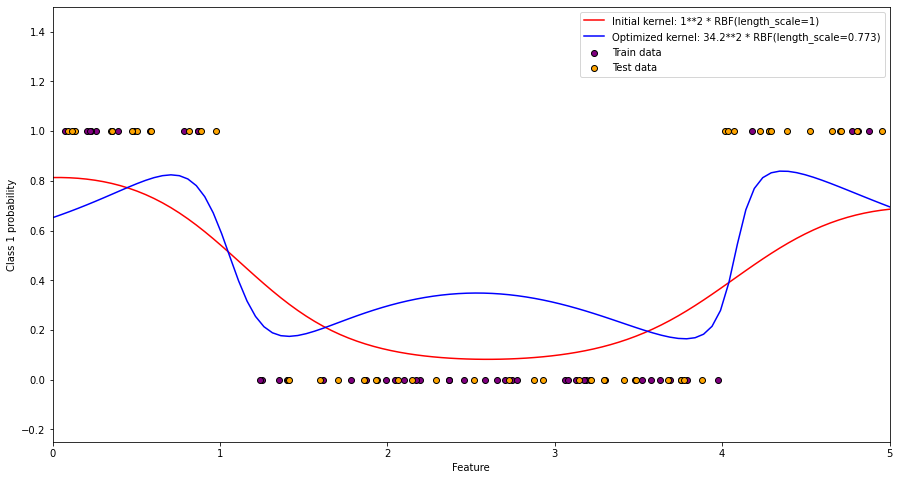

In [46]:
# Plot posteriors
plt.figure(figsize=(15,8))
plt.scatter(XX_train[:, 0], yy_train, c='purple', label="Train data",
            edgecolors=(0, 0, 0))
plt.scatter(XX_test[:, 0], yy_test, c='orange', label="Test data",
            edgecolors=(0, 0, 0))
XX_ = np.linspace(0, 5, 100)
plt.plot(XX_, gp_fix.predict_proba(XX_[:, np.newaxis])[:, 1], 'r',
         label="Initial kernel: %s" % gp_fix.kernel_)
plt.plot(XX_, gp_opt.predict_proba(XX_[:, np.newaxis])[:, 1], 'b',
         label="Optimized kernel: %s" % gp_opt.kernel_)
plt.xlabel("Feature")
plt.ylabel("Class 1 probability")
plt.xlim(0, 5)
plt.ylim(-0.25, 1.5)
plt.legend(loc="best")

# Part 2: implement the GP yourself

- we only consider binary classification
- Use the RBF kernel as a starter
- Do NOT use np.linalg.inv!!! By now you should know the cholesky decomposition. 
- You do NOT need to implement an optimizer for the kernel parameters. Just use the values suggested in the toy example and compare with the fixed version of the GP
- Hints: 
    1. Use the knowledge from the lecture on classification GPs with the Laplace approximation. If you want more background read up in the GP book chapter 3: http://www.gaussianprocess.org/gpml/chapters/RW3.pdf
    2. The likelihood in the lecture is calculated for binary classification with [-1, 1] labels. In this example we use [0,1] labels. Do not forget to change the likelihood accordingly before implementing it.
    3. In the GP algorithm you will have to calculate an integral. There are different methods to do that.  For a brute force approximation check out scipy.integrate.quad 
    4. Add a small value on all the diagonal terms, i.e. Kernel + 1e-6*np.eye(X_train.shape[0]). Why is this useful?

In [13]:
from scipy.linalg import cho_factor, cho_solve

In [47]:
def rbf(x, x_, sigma=1.):
    return np.exp(- ((x - x_) ** 2).sum() / (2 * sigma ** 2))


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def print_accuracy(f, y, plot=False):
    labels = (sigmoid(f) > 0.5)
    print(f"Accuracy: {(labels == y).sum() / len(y)}")
    
    plt.scatter(f, sigmoid(f), c=y)

In [48]:
#TODO: implement the GP yourself
def gp_logistic_train_rasmussen(K, m, y, epsilon=1e-9, max_it=100):
    f_new = m
    
    converged = False
    it = 0
    
    while not converged and it < max_it:
        it += 1
        
        f = f_new
        
        sigmoid_f = sigmoid(f)
        
        r = y - sigmoid_f
        
        W = np.eye(len(sigmoid_f)) * sigmoid_f * (1 - sigmoid_f)

        W_sqrt = np.sqrt(W)
        
        L_c, L_low = cho_factor(np.eye(len(W)) + W_sqrt @ K @ W_sqrt)
        
        b = W @ f + r
        
        a = b - np.sqrt(W) @ cho_solve((L_c.T, L_low), cho_solve((L_c, L_low), W_sqrt @ K @ b))
        
        f_new = K @ a
        
        delta_norm = np.linalg.norm(f - f_new)
        
        print(f"Iteration: {it:4d} | Delta: {delta_norm}")
        
        if delta_norm < epsilon:
            converged = True
            print("Converged!")
            
    return f_new

Iteration:    1 | Delta: 4.372710593283508
Iteration:    2 | Delta: 0.4204086434704088
Iteration:    3 | Delta: 0.11313389952289685
Iteration:    4 | Delta: 0.029230895688822704
Iteration:    5 | Delta: 0.007656263264755932
Iteration:    6 | Delta: 0.0019987449871593497
Iteration:    7 | Delta: 0.0005222485726868928
Iteration:    8 | Delta: 0.00013642651464290694
Iteration:    9 | Delta: 3.5640679524379736e-05
Iteration:   10 | Delta: 9.310788760437875e-06
Iteration:   11 | Delta: 2.4323648480087085e-06
Iteration:   12 | Delta: 6.354340855273083e-07
Iteration:   13 | Delta: 1.6600165404606729e-07
Iteration:   14 | Delta: 4.336649230318579e-08
Iteration:   15 | Delta: 1.1329120458513255e-08
Iteration:   16 | Delta: 2.9596343266039944e-09
Iteration:   17 | Delta: 7.731783810504819e-10
Converged!
Accuracy: 0.96


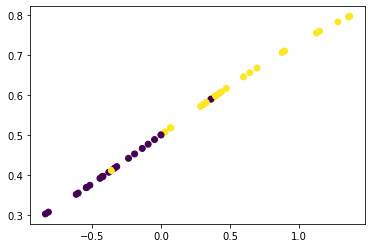

In [49]:
N_train = len(X_train)

K_XX = np.zeros((N_train, N_train))
for i in range(N_train):
    for j in range(i + 1, N_train):
        K_XX[i, j] = K_XX[j, i] = rbf(X_train[i, :], X_train[j, :], sigma=0.05)

f_train = gp_logistic_train_rasmussen(K_XX, m=np.zeros(len(K_XX)), y=y_train, max_it=20)

print_accuracy(f_train, y_train)

In [50]:
N_test = len(X_test)

K_xX = np.zeros((N_test, N_train))
for i in range(N_test):
    for j in range(N_train):
        K_xX[i, j] = rbf(X_test[i, :], X_train[j, :], sigma=0.05)

Accuracy: 1.0


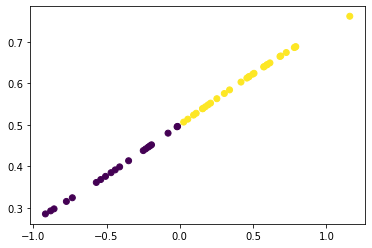

In [51]:
f_test = K_xX @ (y_train - sigmoid(f_train))  # According to Bishop, equation (6.87)

print_accuracy(f_test, y_test)

In [52]:
def gp_logistic_train_bishop(K, m, y, epsilon=1e-9, max_it=100):
    f = m
    
    converged = False
    it = 0
    
    while not converged and it < max_it:
        
        it += 1
        
        sigmoid_f = sigmoid(f)
        
        r = y - sigmoid_f
        
        W = np.eye(len(sigmoid_f)) * sigmoid_f * (1 - sigmoid_f)
        
        B = np.eye(len(K)) + W @ K

        B_c, B_low = cho_factor(B + np.eye(len(f)), lower=True)
        f_new = K @ ( cho_solve((B_c, B_low), (y - sigmoid_f + W @ f)) )
        
        delta_norm = np.linalg.norm(f_new - f)
        
        print(f"Iteration: {it:4d} | Delta: {delta_norm}")
        
        if delta_norm < epsilon:
            converged = True
            print(f"Converged in {it} iterations.")

        f = f_new
        
    return f

## Testcase 1: reuse the framework from the toy example
- make sure that you get similar results to the scikit-learn off-the-shelf GP
- implement one additional Kernel (Matern, DotProduct, RationalQuadratic, ExpSineSquared or another one you choose yourself)

In [53]:
#TODO: implement the kernels
def rat_quad(x, x_, sigma=1., l=1., alpha=1.):
    return sigma ** 2 * (1 + ((x - x_) ** 2).sum() / (2 * alpha * l ** 2)) ** (-alpha)

Iteration:    1 | Delta: 4.473653811043838
Iteration:    2 | Delta: 0.09129097878102949
Iteration:    3 | Delta: 0.007105997339865841
Iteration:    4 | Delta: 0.0005577392377544512
Iteration:    5 | Delta: 4.413025753372914e-05
Iteration:    6 | Delta: 3.4979427713949882e-06
Iteration:    7 | Delta: 2.774660678866848e-07
Iteration:    8 | Delta: 2.201641246279539e-08
Iteration:    9 | Delta: 1.7472326192414467e-09
Iteration:   10 | Delta: 1.3867196032108783e-10
Converged!
Accuracy: 0.98


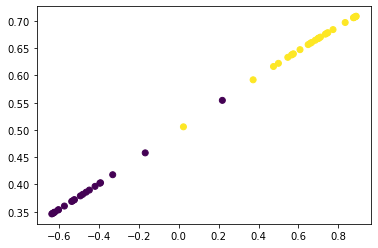

In [54]:
#TODO: compare to task 1 - the simple step function
K_XX = np.zeros((N_train, N_train))
for i in range(N_train):
    for j in range(i + 1, N_train):
        K_XX[i, j] = K_XX[j, i] = rat_quad(X_train[i, :], X_train[j, :], sigma=0.5, l=0.2, alpha=1.)

f_train = gp_logistic_train_rasmussen(K_XX, m=np.zeros(len(K_XX)), y=y_train, max_it=20)

print_accuracy(f_train, y_train)

In [55]:
N_test = len(X_test)

K_xX = np.zeros((N_test, N_train))
for i in range(N_test):
    for j in range(N_train):
        K_xX[i, j] = rat_quad(X_test[i, :], X_train[j, :], sigma=0.5, l=0.2, alpha=1.)

Accuracy: 1.0


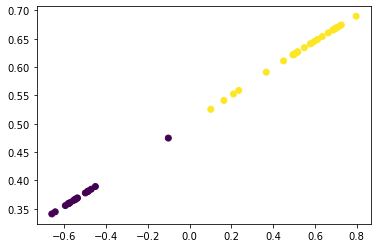

In [56]:
f_test = K_xX @ (y_train - sigmoid(f_train))  # According to Bishop, equation (6.87)

print_accuracy(f_test, y_test)

## Testcase 2: Fashion MNIST Tshirt vs trousers
- we use class 0 (Tshirt/top) and class 1 (trousers) as the two classes for the binary classification
- The nasty data wrangling stuff has already been done for you
- we use the first 5000 samples to train our kernel
- your task is to apply your own implementation to this dataset and report your results

In [57]:
import torch, torchvision
import torchvision.transforms as transforms
torch.manual_seed(42)

In [58]:
# data wrangling: get the first two classes for FMNIST
FMNIST_transform = transforms.Compose([
    transforms.ToTensor(),
])


FMNIST_train = torchvision.datasets.FashionMNIST(
        '~/data/fmnist',
        train=True,
        download=True,
        transform=FMNIST_transform)


FMNIST_test = torchvision.datasets.FashionMNIST(
        '~/data/fmnist',
        train=False,
        download=True,
        transform=FMNIST_transform)

def get_subset_FMNIST(classes=[0,1], dataset=FMNIST_train):
    
    dataset.targets = dataset.targets.clone().detach()
    idx = torch.zeros(dataset.targets.size()).byte()
    for c in classes:
        idx += (dataset.targets==c).byte()
    dataset.targets= dataset.targets[idx]
    dataset.data = dataset.data[idx.numpy().astype(np.bool)]
    
    #remap all classes to list of ints starting at 1
    map_dict = dict()
    for i, c in enumerate(classes):
        map_dict[c] = i
    
    for i, t in enumerate(dataset.targets):
        dataset.targets[i] = map_dict[t.item()]
    
    return(dataset.data, dataset.targets)

classes = [0,1]
FMNIST_train.data, FMNIST_train.targets = get_subset_FMNIST(classes=classes, dataset=FMNIST_train)
FMNIST_test.data, FMNIST_test.targets = get_subset_FMNIST(classes=classes, dataset=FMNIST_test)
print(len(FMNIST_train.targets))
print(FMNIST_train.targets[:10])
print(len(FMNIST_test.targets))
print(FMNIST_test.targets[:10])

12000
tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 1])
2000
tensor([1, 1, 1, 1, 0, 1, 0, 0, 1, 1])


C:\cb\pytorch_1000000000000\work\aten\src\ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
C:\cb\pytorch_1000000000000\work\aten\src\ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.


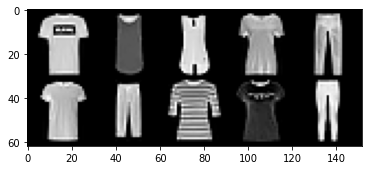

In [59]:
# have a look at them to verify they are only 
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    #plt.imshow(npimg)
    plt.show()

images = FMNIST_train.data[:10].view(10, 1, 28, 28)
imshow(torchvision.utils.make_grid(images, nrow=5))

In [60]:
# further data wrangling
X_train = FMNIST_train.data[:5000].view(-1, 28*28)
print(X_train.shape)
y_train = FMNIST_train.targets[:5000].view(-1)
print(y_train[:10])

X_test = FMNIST_test.data.view(-1, 28*28)
print(X_test.shape)
y_test = FMNIST_test.targets.view(-1)
print(y_test[:10])

#normalize the data between [-1,1]
X_train = (X_train.float() - 128) / 128
X_test = (X_test.float() - 128) / 128

X_train, X_test = X_train.numpy(), X_test.numpy()
y_train, y_test = y_train.numpy(), y_test.numpy()

torch.Size([5000, 784])
tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 1])
torch.Size([2000, 784])
tensor([1, 1, 1, 1, 0, 1, 0, 0, 1, 1])


In [38]:
#The nasty data wrangling stuff has been done for you. 
#TODO: test which kernel works for this problem?

In [61]:
X_train = X_train[:1000, :]
y_train = y_train[:1000]

In [62]:
N_train = X_train.shape[0]

K_XX = np.zeros((N_train, N_train))

for i in range(N_train):
    for j in range(i+1, N_train):
        x1 = X_train[i, :]
        x2 = X_train[j, :]
#         K_XX[i, j] = K_XX[j, i] = rat_quad(x1, x2, sigma=0.5, l=9, alpha=4)
        K_XX[i, j] = K_XX[j, i] = rbf(x1, x2, sigma=3)

Iteration:    1 | Delta: 38.433131624356974
Iteration:    2 | Delta: 17.60216655243073
Iteration:    3 | Delta: 10.900992256273716
Iteration:    4 | Delta: 7.457515486163194
Iteration:    5 | Delta: 4.912654850258728
Iteration:    6 | Delta: 3.3739530114498124
Iteration:    7 | Delta: 2.265506997087824
Iteration:    8 | Delta: 1.5493242827525078
Iteration:    9 | Delta: 1.0477139562702662
Iteration:   10 | Delta: 0.7143638560284498
Iteration:   11 | Delta: 0.48448222807523794
Iteration:   12 | Delta: 0.32981208951039437
Iteration:   13 | Delta: 0.22396036242294878
Iteration:   14 | Delta: 0.15234357998469758
Iteration:   15 | Delta: 0.10350791840886228
Iteration:   16 | Delta: 0.07038299289308805
Iteration:   17 | Delta: 0.04783311333554841
Iteration:   18 | Delta: 0.0325198570117256
Iteration:   19 | Delta: 0.02210348321423335
Iteration:   20 | Delta: 0.015026099341049074
Iteration:   21 | Delta: 0.010213672237302993
Iteration:   22 | Delta: 0.006943069383649711
Iteration:   23 | Delt

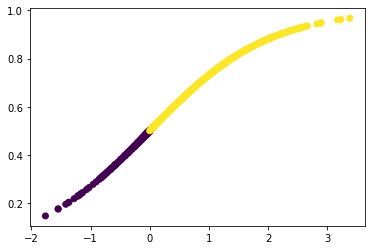

In [63]:
f_train = gp_logistic_train_rasmussen(K_XX, m=np.zeros(len(K_XX)), y=y_train, epsilon=1e-9, max_it=50)

print_accuracy(f_train, y_train)

In [ ]:
N_test = len(X_test)

K_xX = np.zeros((N_test, N_train))
for i in range(N_test):
    for j in range(N_train):
        K_xX[i, j] = rbf(X_test[i, :], X_train[j, :], sigma=3)

In [ ]:
f_test = K_xX @ (y_train - sigmoid(f_train))  # According to Bishop, equation (6.87)

print_accuracy(f_test, y_test)